# Install requirements

In [8]:
%pip install --upgrade numpy scipy pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/substance.git@master

  Cloning https://github.com/ParkhomenkoDV/substance.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-req-build-zw22pnm6
  Resolved https://github.com/ParkhomenkoDV/substance.git to commit ee75749da2a59d511d1e2f8c4c7df036749135f1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for substance: filename=substance-2025.4.9.10-py3-none-any.whl size=31588 sha256=c978511df48733479edfff2b9cdea70efac6837ada341cc12de006884c8cdcfe
  Stored in directory: C:\Users\parkh\AppData\Local\Temp\pip-ephem-wheel-cache-bf45_wkx\wheels\c9\58\5a\ef8c3a173bf3e3a1dcd34b0dca04004dae8220ed50534162ed
Successfully built substance
  Attempting uninstall: substance
    Found existing installation: substance 

  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-zw22pnm6'


In [10]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/disk.git@master

  Cloning https://github.com/ParkhomenkoDV/disk.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-req-build-hhy_tjfe
  Resolved https://github.com/ParkhomenkoDV/disk.git to commit 1080fbef1a130c6afdc5e6f78cd3fb9b101003ef
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-8za3f6dq\decorators_d001cd16c2cc4945a1d477dada312f30
  Resolved https://github.com/ParkhomenkoDV/decorators.git to commit 3726185bc73510a53bbde003d0014f358e1bca26
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: s

  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/disk.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-hhy_tjfe'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-8za3f6dq\decorators_d001cd16c2cc4945a1d477dada312f30'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-8za3f6dq\substance_e8e712ac30f0462984de5774c61e5c27'


**Restart kernel!**

# Import libraries

In [1]:
from numpy import array, arange, linspace
from scipy import interpolate
import pandas as pd

In [2]:
from substance import Material
from disk import Disk

# Create material

In [3]:
material = Material('ВЖ175',  # ХН54К15МБЮВТ
                    {
                        "density": 8266,
                        "alpha": 11.8 * 10 ** -6,
                        "E": 2 * 10 ** 11,
                        "mu": 0.3,
                        "sigma_s": 1570 * 10 ** 6,
                        "sigma_1000": interpolate.interp1d([1173, 1273, 1323, 1373], 
                                                            array([313.9, 166.8, 119.7, 78.5]) * 10**6, 
                                                            kind=2, fill_value='extrapolate'),
                        "sigma_5000": interpolate.interp1d([1173, 1273, 1323, 1373], 
                                                            array([245.3, 124.6, 83.4, 49.1]) * 10**6, 
                                                            kind=2, fill_value='extrapolate'),
                        "sigma_10000": interpolate.interp1d([1173, 1273, 1323, 1373], 
                                                            array([225.6, 107.9, 68.7, 39.2]) * 10**6, 
                                                            kind=2, fill_value='extrapolate')
                    })

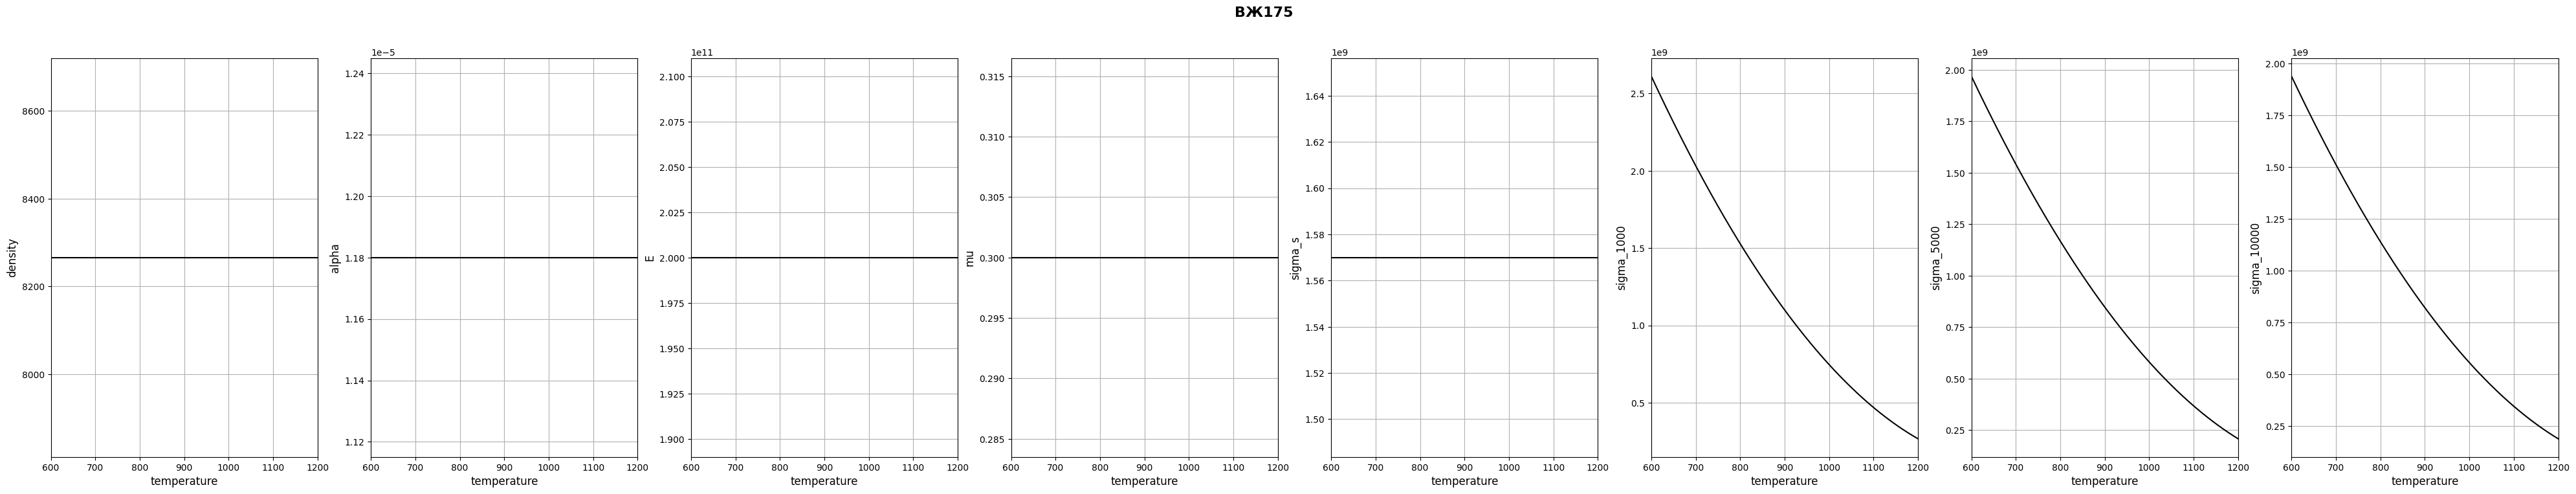

In [4]:
material.show(temperature=linspace(300, 900, 6+1) + 300, figsize=(50, 8))

# Create disk geometry

In [5]:
radius_thickness = (
    (67.50, 98.00),
    (68.38, 102.24),
    (70.50, 104.00),
    (81.52, 104.00),
    (85.00, 101.78),
    (87.19, 95.95),
    (91.26, 77.39),
    (96.71, 60.30),
    (101.45, 51.17),
    (107.07, 44.33),
    (116.00, 36.00),
    (129.27, 26.27),
    (133.82, 23.725),
    (138.50, 22.64),
    (160.10, 10.50 * 2),
    (167.16, 12.84 * 2),
    (176.24, 12.84 * 2),
    (181.70, 19.48),
    (254.63, 14.03),
    (257.63, 14.00),
    (259.98, 14.28),
    (262.30, 15.11),
    (273.62, 21.68),
    (276.07, 25.33),
    (277.00, 32.00),
    (288.00, 32.00),
)

In [6]:
radius, thickness = array(radius_thickness).T / 1000
nholes, rholes, dholes = [9], [282.5 / 1000], [6.6 / 1000]

disk = Disk(material=material,
            radius=radius, thickness=thickness,
            nholes=nholes, rholes=rholes, dholes=dholes
            )

In [7]:
pd.DataFrame({'radius': disk.radius, 'thickness': disk.thickness}) * 1000

radius  thickness
0    67.50     98.000
1    68.38    102.240
2    70.50    104.000
3    81.52    104.000
4    85.00    101.780
5    87.19     95.950
6    91.26     77.390
7    96.71     60.300
8   101.45     51.170
9   107.07     44.330
10  116.00     36.000
11  129.27     26.270
12  133.82     23.725
13  138.50     22.640
14  160.10     21.000
15  167.16     25.680
16  176.24     25.680
17  181.70     19.480
18  254.63     14.030
19  257.63     14.000
20  259.98     14.280
21  262.30     15.110
22  273.62     21.680
23  276.07     25.330
24  277.00     32.000
25  288.00     32.000

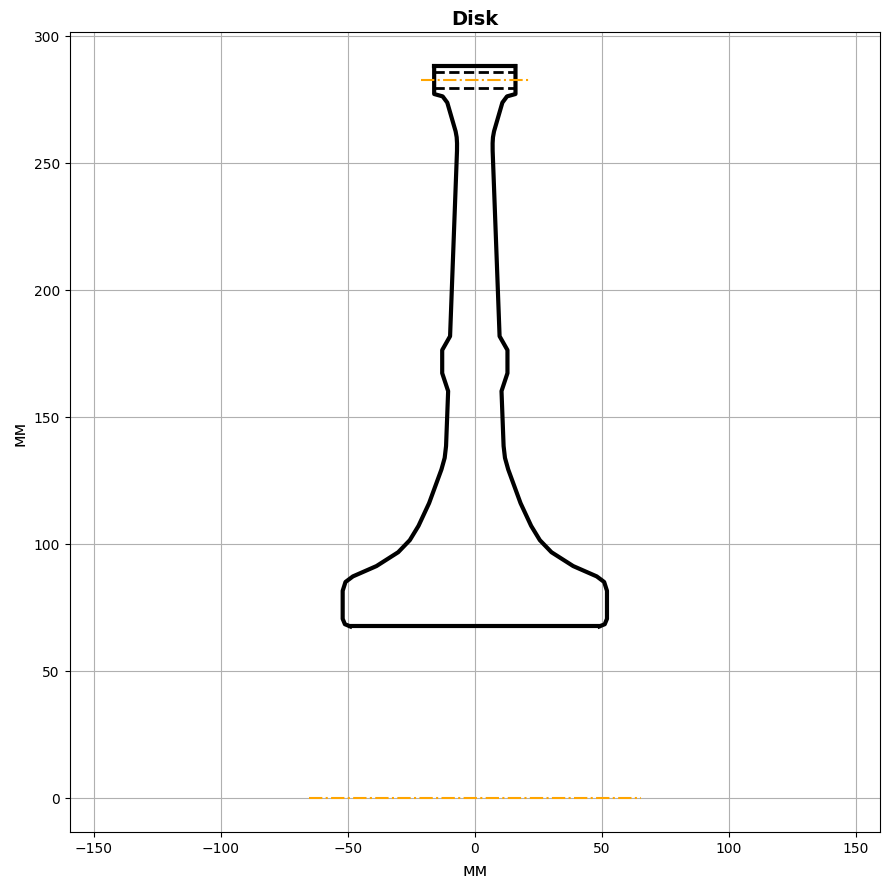

In [9]:
disk.show(figsize=(9, 9), xlabel='мм', ylabel='мм')

# Create conditions

In [11]:
rotation_frequency = 1570.8
temperature0 = 293.15
pressure = (0, 120 * 10 ** 6)
temperature = (575, 875)

condition = dict(rotation_frequency=rotation_frequency, 
                 temperature0=temperature0, 
                 pressure=pressure, 
                 temperature=temperature)
condition

{'rotation_frequency': 1570.8,
 'temperature0': 293.15,
 'pressure': (0, 120000000),
 'temperature': (575, 875)}

# Tensions

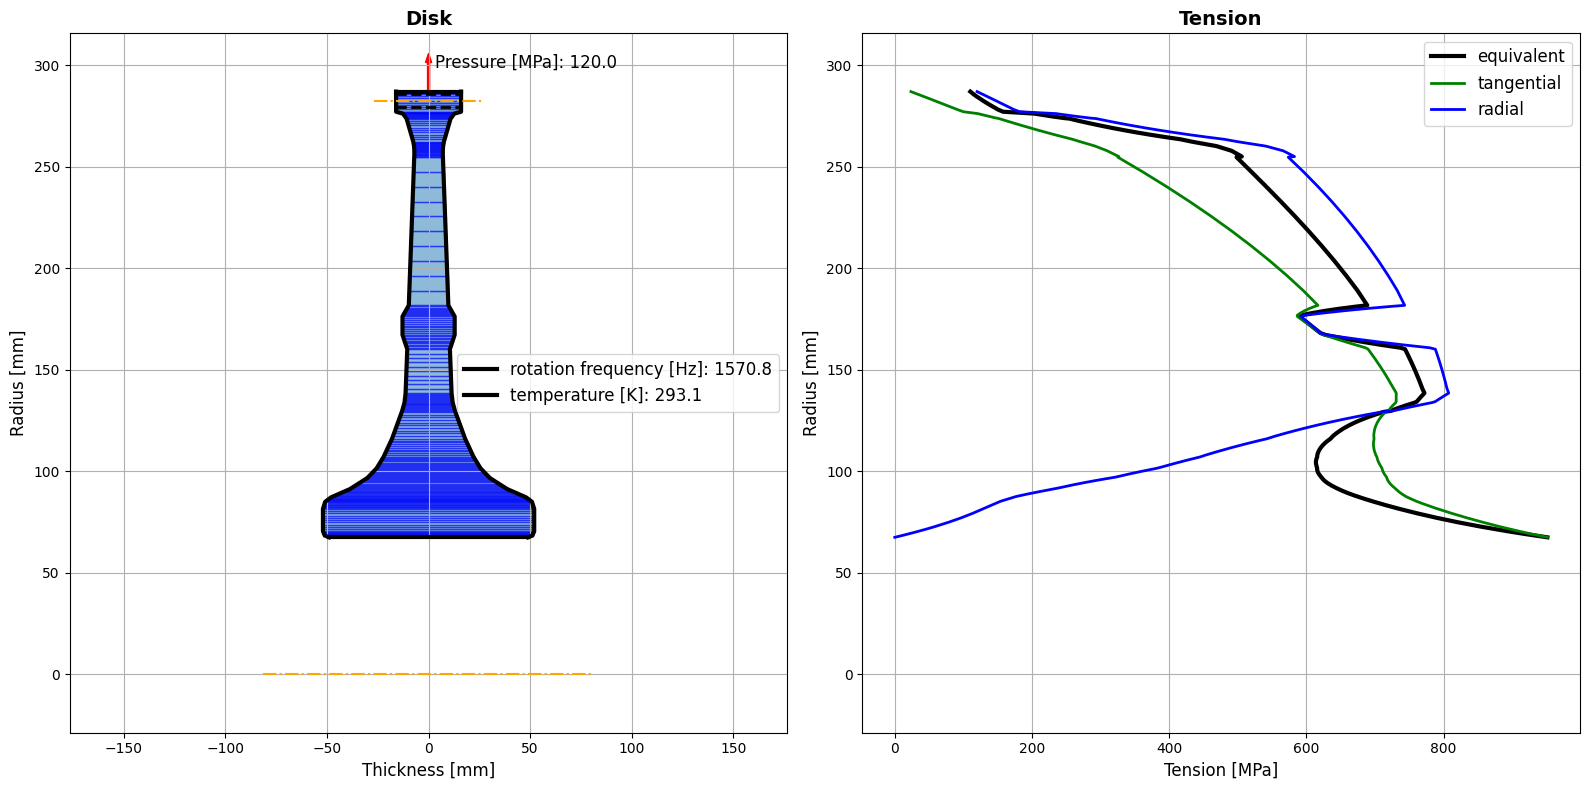

In [185]:
tensions = disk.tensions(**condition, discreteness=10, show=True)

In [186]:
f_sigma_t = interpolate.interp1d(tensions['radius'], tensions['tension_t'], kind=1)
f_sigma_r = interpolate.interp1d(tensions['radius'], tensions['tension_r'], kind=1)
for i in range(len(disk.nholes)):
    local_tension = disk.local_tension(disk.nholes[i],  disk.rholes[i], disk.dholes[i],
                                        float(f_sigma_t(disk.rholes[i])), float(f_sigma_r(disk.rholes[i])))
    print(f'holes: {i}, nholes []: {disk.nholes[i]}, rholes: {disk.rholes[i]}, dholes: {disk.dholes[i]}')
    print(f'tension_t in {local_tension}')

holes: 0, nholes []: 5, rholes: 0.2825, dholes: 0.0066
tension_t in (27.14426877692311, 28.378099175874155)


# Design equal strength disk

In [187]:
equal_strength = disk.equal_strength(600 * 10 ** 6, condition["rotation_frequency"], max(condition['temperature']), ndis=25, show=False)

In [188]:
radius_equal_strength = linspace(0, disk.radius[-1], 10, endpoint=True)
thickness_equal_strength = equal_strength(radius_equal_strength)

disk_equal_strength = Disk(material=disk.material, radius=radius_equal_strength, thickness=thickness_equal_strength)

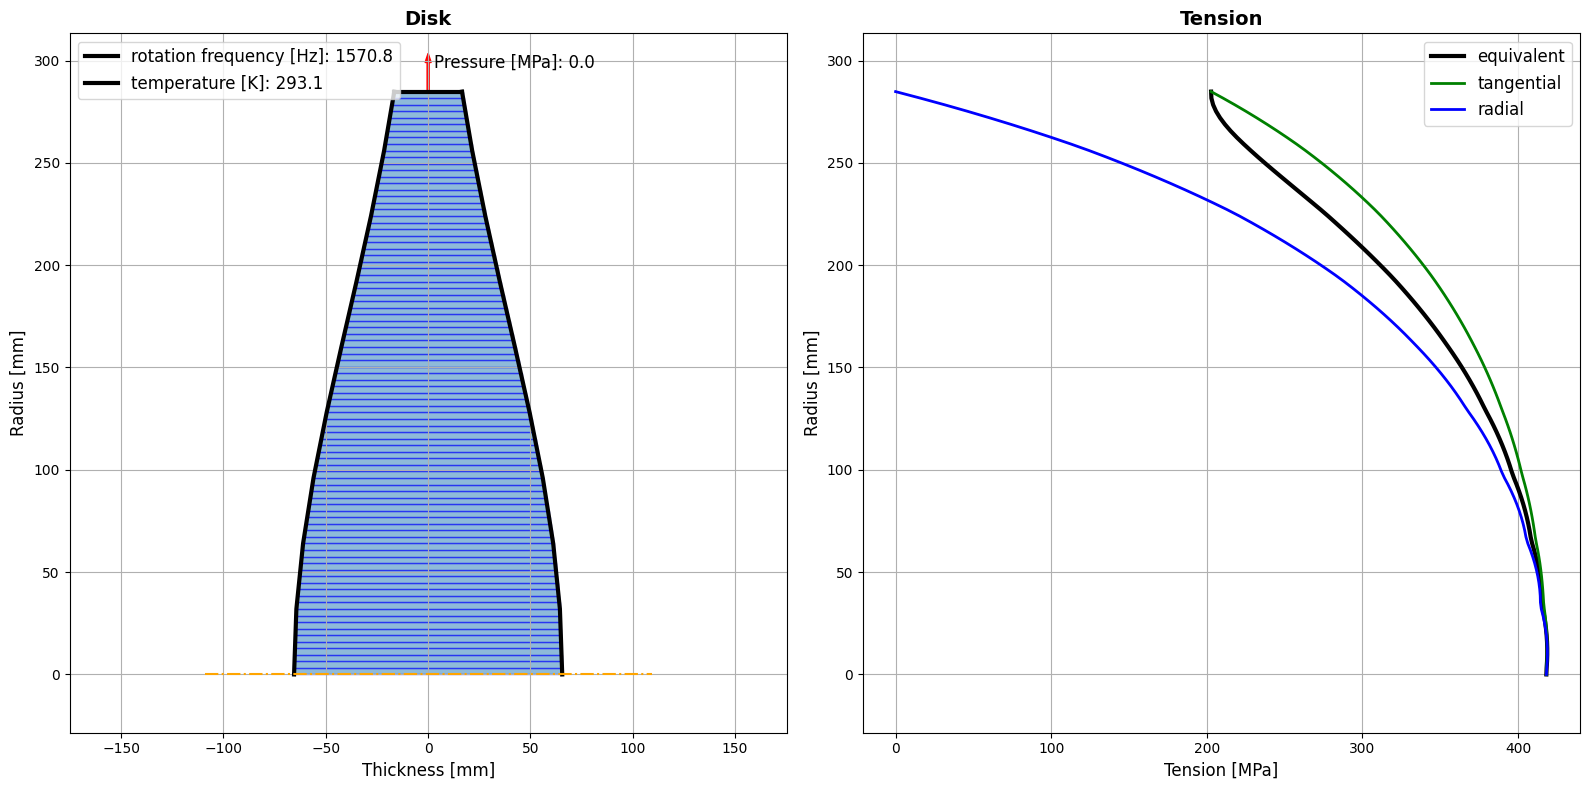

In [189]:
tensions = disk_equal_strength.tensions(rotation_frequency=condition['rotation_frequency'],
                                    temperature0=condition['temperature0'],
                                    pressure=(0, 0), temperature=(700, 700),
                                    discreteness=10, show=True)

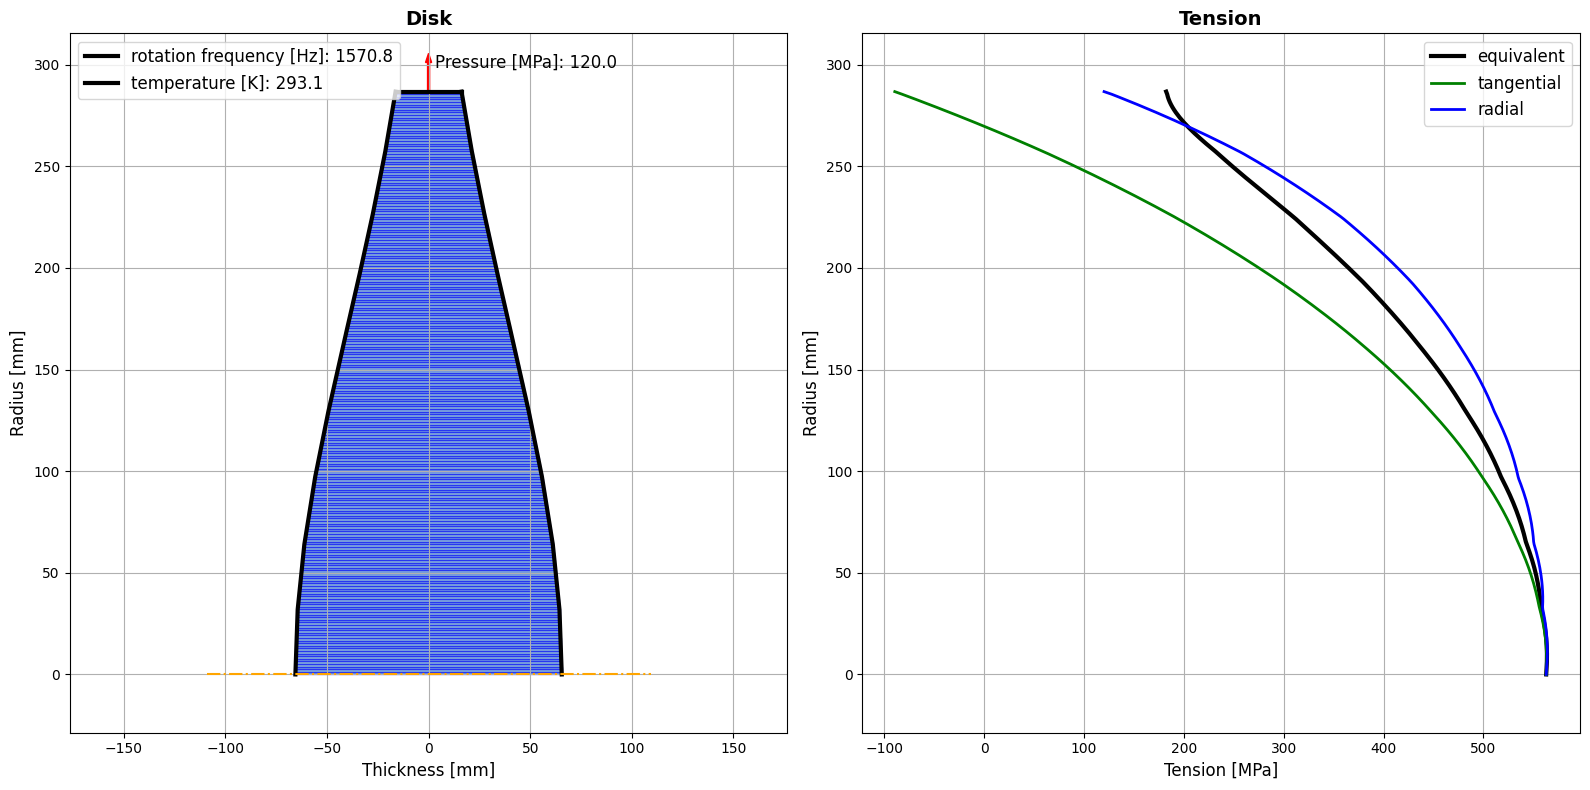

In [190]:
tensions = disk_equal_strength.tensions(**condition, discreteness=25, show=True)

In [191]:
disk.frequency_safety_factor(condition["rotation_frequency"], temperature=600, pressure=pressure)

((2.0779424466809706, 2.1933836937188023), '')

# Campbell diagram

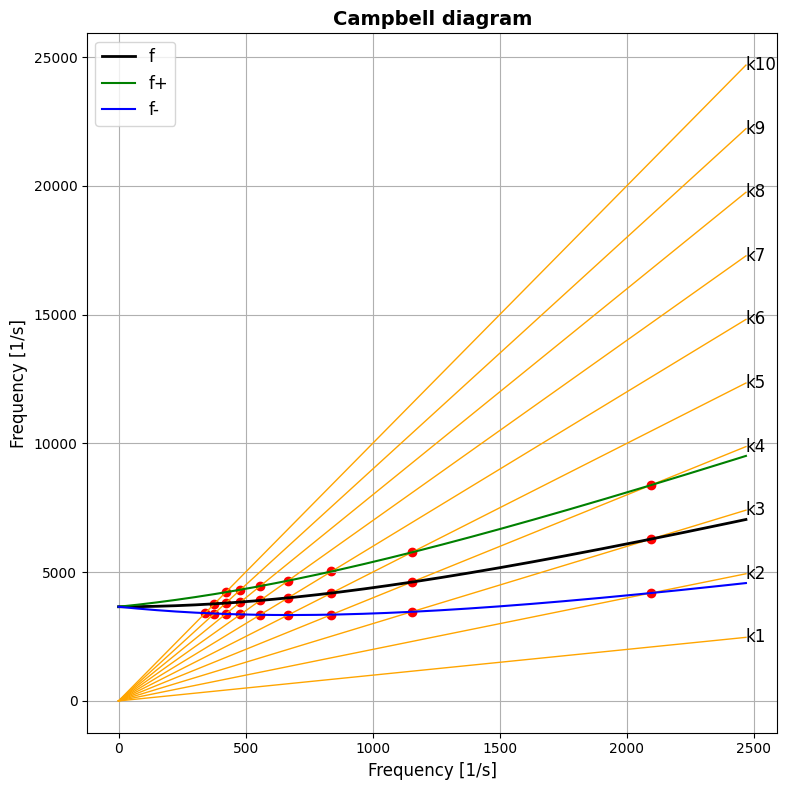

In [192]:
resonance = disk.campbell_diagram(0, 1, 1, condition["rotation_frequency"]*0.25, multiplicity=arange(1, 10+1, 1))

In [193]:
resonance

([340.991843,
  377.144607,
  422.193899,
  480.049686,
  557.443331,
  667.213867,
  837.991883,
  1153.730227,
  2094.292715],
 '1/s')